## Programming for Data Analysis - Project 1 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

## Introduction ##

This project sets out to simulate traffic levels between junctions 6 and 7 on the m50, based on an analysis of four weeks of traffic data taken during the month of October 2023. I will seek to establish how traffic levels are related to whether the day is a weekday or weekend, how traffic is distributed on average over a 24 hour period, and how the distribution of northbound traffic compares with that of southbound traffic.

To carry out this analysis, I have downloaded the monthly volume report for this traffic October 2023 from the site https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080. 

This dataset is of interest to me, as I currently travel on the m50 to work five days per month (southbound in the morning, northbound in the evening), and a better understanding of how traffic levels are distributed on the m50 would help me better plan my commute. I chose the area between junctions 6 and 7 as it strikes me as a busy area of the m50 during my commute.

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [117]:
df = pd.read_csv("J6_traffic_hourly_ints.csv")
print(df)

     week  hour  day day_type  southbound  northbound
0       1     0  Mon  weekday         812         461
1       1     1  Mon  weekday         515         266
2       1     2  Mon  weekday         410         283
3       1     3  Mon  weekday         311         546
4       1     4  Mon  weekday         629        1018
..    ...   ...  ...      ...         ...         ...
667     4    19  Sun  weekend        2889        2676
668     4    20  Sun  weekend        2172        2004
669     4    21  Sun  weekend        1490        1540
670     4    22  Sun  weekend        1582        1138
671     4    23  Sun  weekend        1192         845

[672 rows x 6 columns]


To begin getting a sense of what this dataset represents, I will plot the levels of southbound traffic over one day in the dataset: Monday of Week 1.

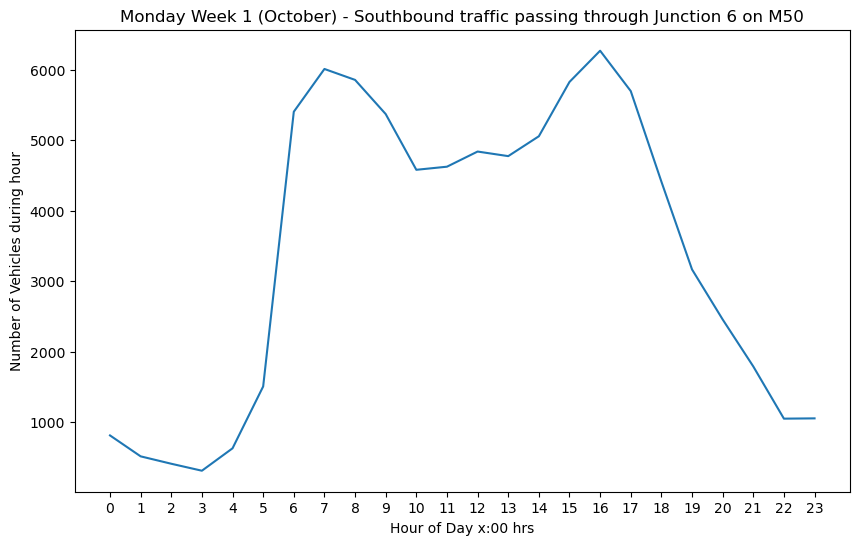

In [118]:
monday_wk1 = df.loc[(df['day'] == 'Mon') & (df['week'] == 1)]

plt.figure(figsize=(10,6))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather than default interval of 5 hours
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

To get a better sense of what southbound traffic levels might be like on a typical Monday, we can create a plot of the average volume of traffic during each hour of Monday, calculated over the four Mondays of the sample dataset:

In [119]:
# First we create a dataframe consisting only of rows where the data in the 'day' column is 'monday'.

monday = df.loc[df['day'] == 'Mon']

print(monday)

# Next we use the groupby() function on this 'monday' dataframe to seperate the data by the contents of the 'hour' column. 
# This creates 24 groups of data from the 'monday' dataframe
# We then use the .mean method on the 'southbound' column within each of these groups to calculate the mean value (over 4 weeks)
# for southbound traffic for each hour of each day.
mean_mon_s_hourly = monday.groupby('hour')['southbound'].mean()

print()
print('The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_s_hourly)



     week  hour  day day_type  southbound  northbound
0       1     0  Mon  weekday         812         461
1       1     1  Mon  weekday         515         266
2       1     2  Mon  weekday         410         283
3       1     3  Mon  weekday         311         546
4       1     4  Mon  weekday         629        1018
..    ...   ...  ...      ...         ...         ...
523     4    19  Mon  weekday        3120        3266
524     4    20  Mon  weekday        2467        2094
525     4    21  Mon  weekday        1889        1475
526     4    22  Mon  weekday        1246        1066
527     4    23  Mon  weekday         842         753

[96 rows x 6 columns]

The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      905.75
1      563.50
2      430.00
3      315.25
4      604.25
5     1558.75
6     5407.50
7     5915.75
8     5717.75
9     5250.50
10    4676.25
11    4685.75
12    4803.50
13    4922.25
14    4971.00
15    5798

Next, we can work out which hour of Monday has the highest average traffic level over the four weeks, and what that traffic level is. We can use the fact the indices of the output of mean_mon_s_hourly have the same numeric value as the hours which they relate to (eg. index [7] relates to the hour beginning at 7:00).

In [120]:
max_row_mon_s_hourly = mean_mon_s_hourly.idxmax()
max_value_mon_s_hourly = mean_mon_s_hourly.max()
print(f'The maximum average hourly traffic level on Mondays is {max_value_mon_s_hourly} and this occurs during the hour starting at {max_row_mon_s_hourly}:00')

The maximum average hourly traffic level on Mondays is 5915.75 and this occurs during the hour starting at 7:00


Next, we can plot this average hourly traffic for southbound traffic measured over four consecutive Mondays in October:

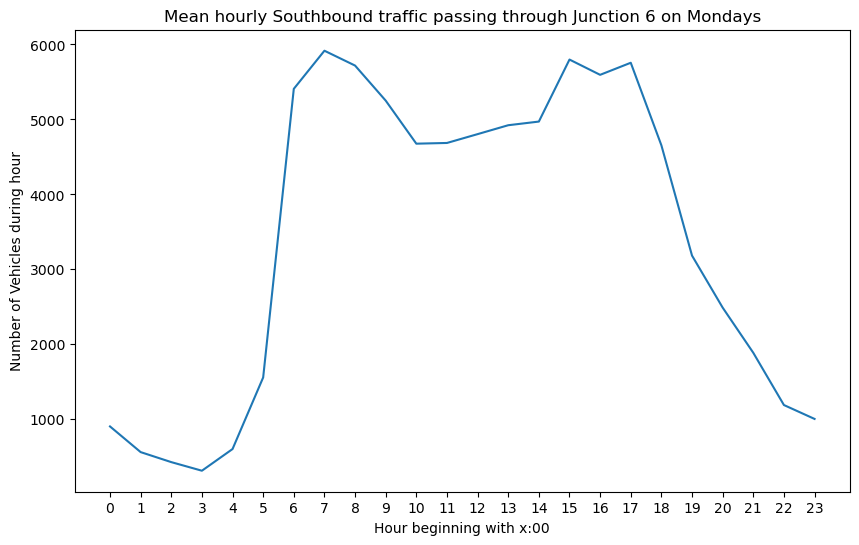

In [121]:
plt.figure(figsize=(10,6))
plt.plot(mean_mon_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      # seperate x-axis into 24 intervals rather than 5
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Mondays')
plt.show()

Next, we can plot the same kind of data but for Northbound traffic:

In [129]:
mean_mon_n_hourly = monday.groupby('hour')['northbound'].mean()

print()
print('The average figure for northbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_n_hourly)

max_row_mon_n_hourly = mean_mon_n_hourly.idxmax()
max_value_mon_n_hourly = mean_mon_n_hourly.max()
print()
print()
print(f'The maximum average hourly traffic level on Mondays is {max_value_mon_n_hourly} and this occurs during the hour starting at {max_row_mon_n_hourly}:00.')


The average figure for northbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      479.50
1      279.25
2      281.75
3      545.25
4     1049.75
5     1592.75
6     3802.75
7     5749.50
8     5920.50
9     5293.00
10    4761.50
11    4703.75
12    4784.75
13    5042.00
14    5111.25
15    5979.25
16    6019.75
17    5959.00
18    5103.75
19    3293.50
20    2114.75
21    1495.50
22    1070.00
23     722.75
Name: northbound, dtype: float64


The maximum average hourly traffic level on Mondays is 6019.75 and this occurs during the hour starting at 16:00.


I will now generate a plot of the average hourly northbound traffic for Mondays, including the plot for average hourly southbound traffic on the same graph to allow for an easier comparison:

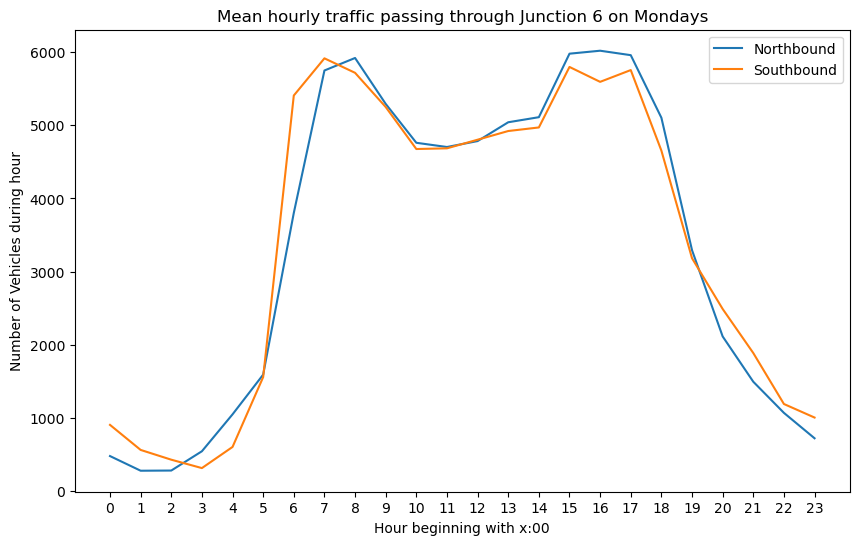

In [133]:
plt.figure(figsize=(10,6))
plt.plot(mean_mon_n_hourly, label = 'Northbound')
plt.plot(mean_mon_s_hourly, label = 'Southbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Northbound", "Southbound"], loc ="upper right")
plt.show()

This graph gives us a sense of which hours are the busiest and least busy on a Monday. To get a sense of how average traffic levels look for each other day of the week, we can plot similar graphs as the one above:

In [122]:
tuesday = df.loc[df['day'] == 'Tues']
wednesday = df.loc[df['day'] == 'Wed']
thursday = df.loc[df['day'] == 'Thurs']
friday = df.loc[df['day'] == 'Fri']
saturday = df.loc[df['day'] == 'Sat']
sunday = df.loc[df['day'] == 'Sun']

mean_tues_s_hourly = tuesday.groupby('hour')['southbound'].mean()
mean_wed_s_hourly = wednesday.groupby('hour')['southbound'].mean()
mean_thurs_s_hourly = thursday.groupby('hour')['southbound'].mean()
mean_fri_s_hourly = friday.groupby('hour')['southbound'].mean()
mean_sat_s_hourly = saturday.groupby('hour')['southbound'].mean()
mean_sun_s_hourly = sunday.groupby('hour')['southbound'].mean()

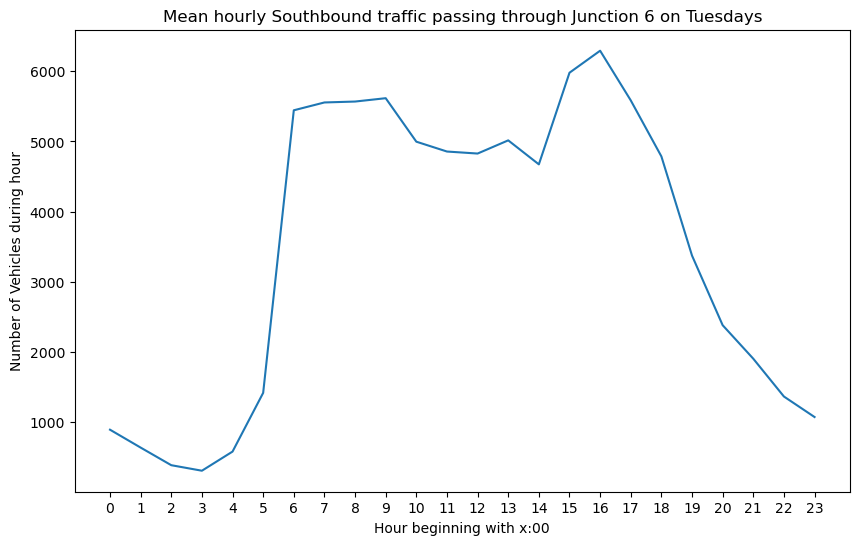

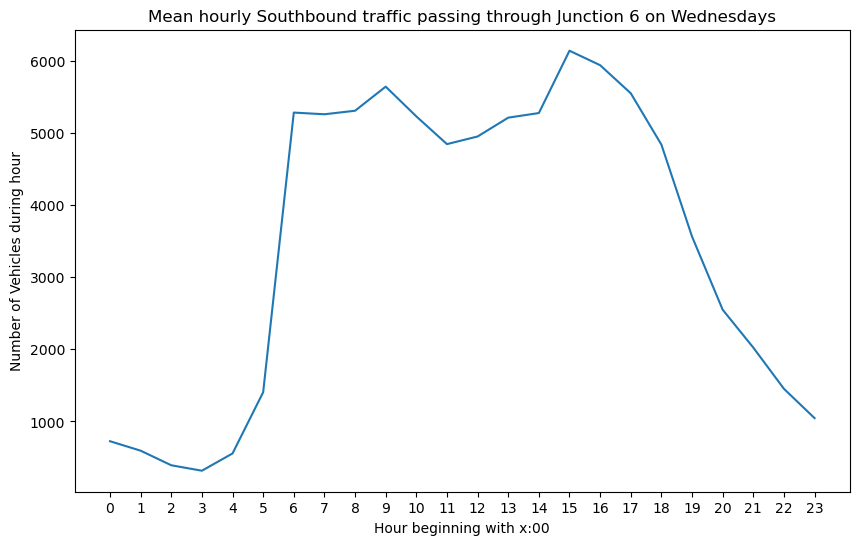

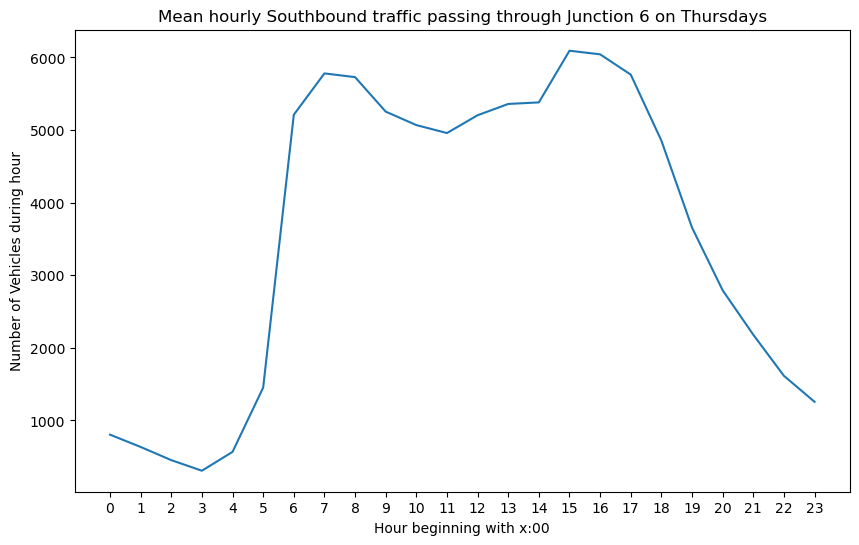

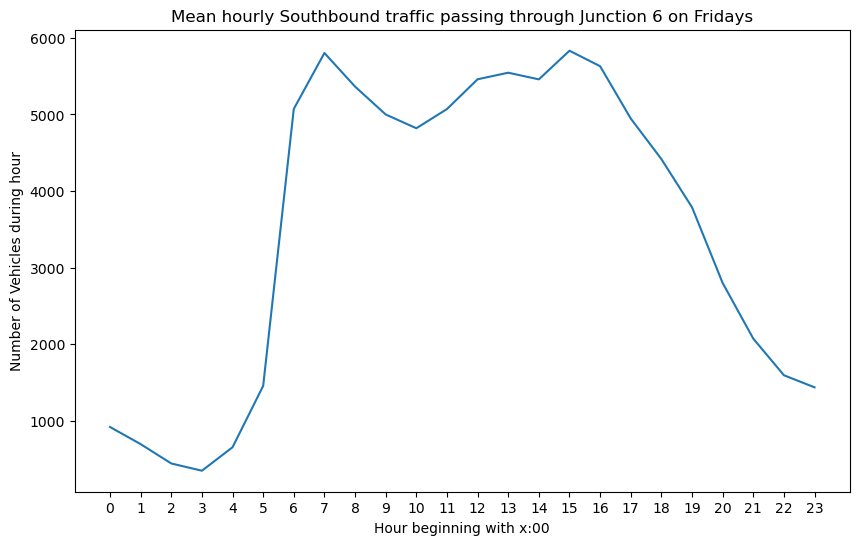

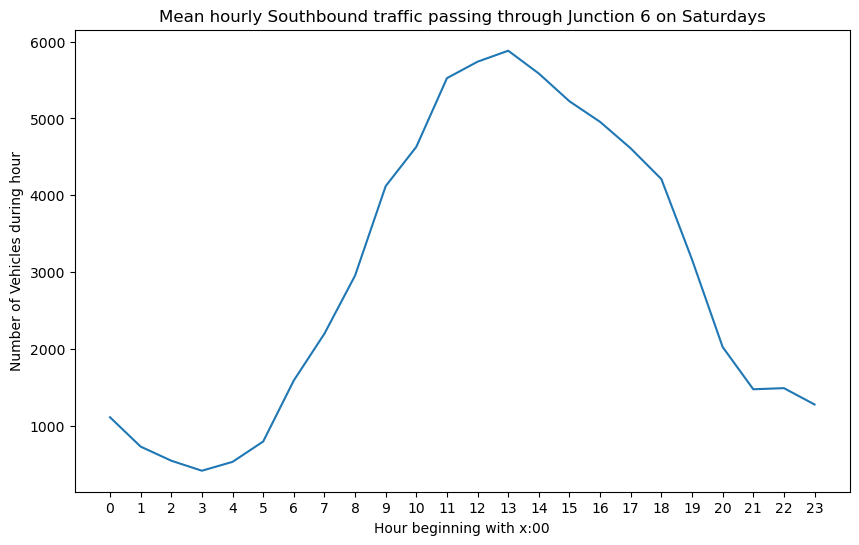

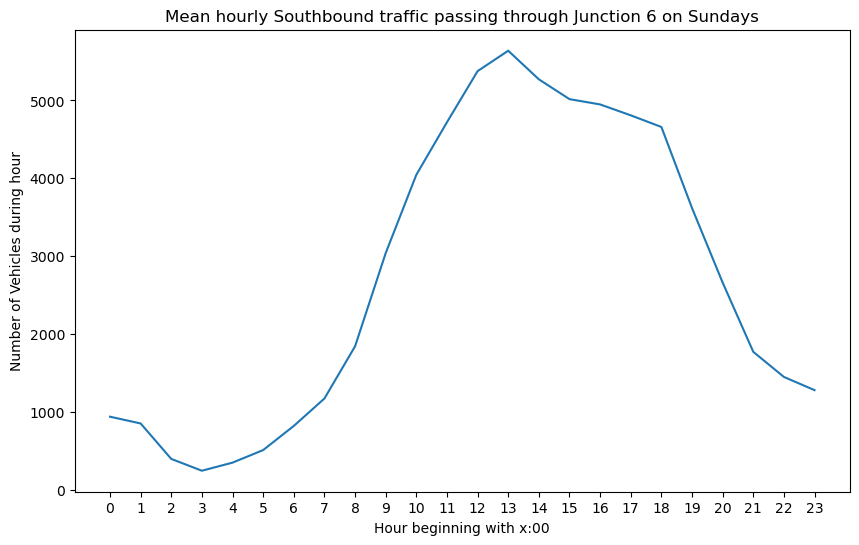

In [123]:
plt.figure(figsize=(10,6))
plt.plot(mean_tues_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Tuesdays')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(mean_wed_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Wednesdays')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(mean_thurs_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Thursdays')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(mean_fri_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Fridays')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(mean_sat_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Saturdays')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(mean_sun_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Sundays')
plt.show()

In [124]:
max_row_tues_s_hourly = mean_tues_s_hourly.idxmax()
max_value_tues_s_hourly = mean_tues_s_hourly.max()

max_row_wed_s_hourly = mean_wed_s_hourly.idxmax()
max_value_wed_s_hourly = mean_wed_s_hourly.max()

max_row_thurs_s_hourly = mean_thurs_s_hourly.idxmax()
max_value_thurs_s_hourly = mean_thurs_s_hourly.max()

max_row_fri_s_hourly = mean_fri_s_hourly.idxmax()
max_value_fri_s_hourly = mean_fri_s_hourly.max()

max_row_sat_s_hourly = mean_sat_s_hourly.idxmax()
max_value_sat_s_hourly = mean_sat_s_hourly.max()

max_row_sun_s_hourly = mean_sun_s_hourly.idxmax()
max_value_sun_s_hourly = mean_sun_s_hourly.max()

print(f'The maximum average hourly traffic level on Tuesdays is {max_value_tues_s_hourly} and this occurs during the hour starting at {max_row_tues_s_hourly}:00')
print(f'The maximum average hourly traffic level on Wednesdays is {max_value_wed_s_hourly} and this occurs during the hour starting at {max_row_wed_s_hourly}:00')
print(f'The maximum average hourly traffic level on Thursdays is {max_value_thurs_s_hourly} and this occurs during the hour starting at {max_row_thurs_s_hourly}:00')
print(f'The maximum average hourly traffic level on Fridays is {max_value_fri_s_hourly} and this occurs during the hour starting at {max_row_fri_s_hourly}:00')
print(f'The maximum average hourly traffic level on Saturdays is {max_value_sat_s_hourly} and this occurs during the hour starting at {max_row_sat_s_hourly}:00')
print(f'The maximum average hourly traffic level on Sundays is {max_value_sun_s_hourly} and this occurs during the hour starting at {max_row_sun_s_hourly}:00')


The maximum average hourly traffic level on Tuesdays is 6293.75 and this occurs during the hour starting at 16:00
The maximum average hourly traffic level on Wednesdays is 6143.25 and this occurs during the hour starting at 15:00
The maximum average hourly traffic level on Thursdays is 6092.75 and this occurs during the hour starting at 15:00
The maximum average hourly traffic level on Fridays is 5832.5 and this occurs during the hour starting at 15:00
The maximum average hourly traffic level on Saturdays is 5881.75 and this occurs during the hour starting at 13:00
The maximum average hourly traffic level on Sundays is 5639.0 and this occurs during the hour starting at 13:00


We can see that at the broadest level of description, southbound traffic during all five weekdays follow a roughly similar distribution, with a peak period between 6 am and 10 am, and again between 2 pm and 7 pm. On Mondays, the busiest hour is between 7 and 8 am, which can possibly be explained by additional people travelling back to Dublin for work and college on a Monday morning after having spent the weekend outside the country.

For weekends, we find a very different distribution than that found for weekdays; traffic on both days seems to peak during the hour of 13:00, although on Sunday evening we see a steadier fall off in the second half of the day; my guess is that this is due to people return to their accomodation in Dublin following the weekend.


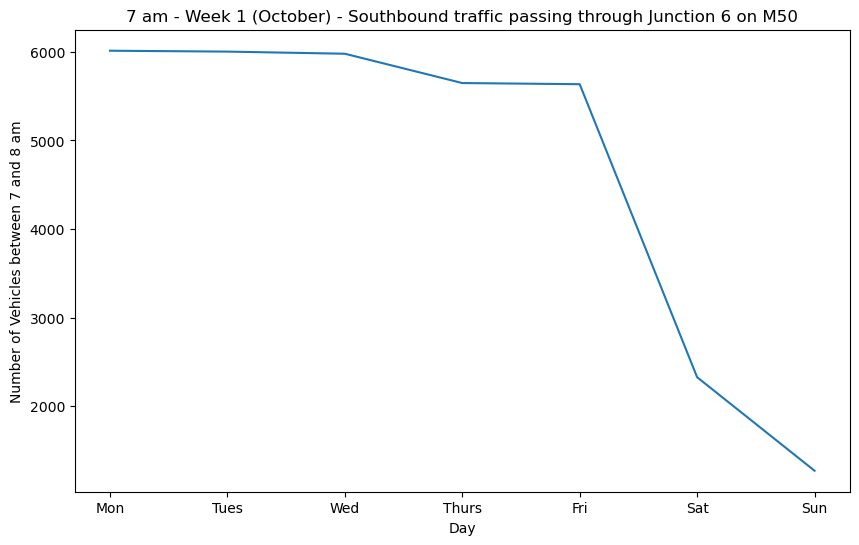

In [125]:
week1_7am = df.loc[(df['week'] == 1) & (df['hour'] == 7)]

plt.figure(figsize=(10,6))
plt.plot(week1_7am['day'], week1_7am['southbound'])
plt.xlabel('Day')
plt.ylabel('Number of Vehicles between 7 and 8 am')
plt.title('7 am - Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

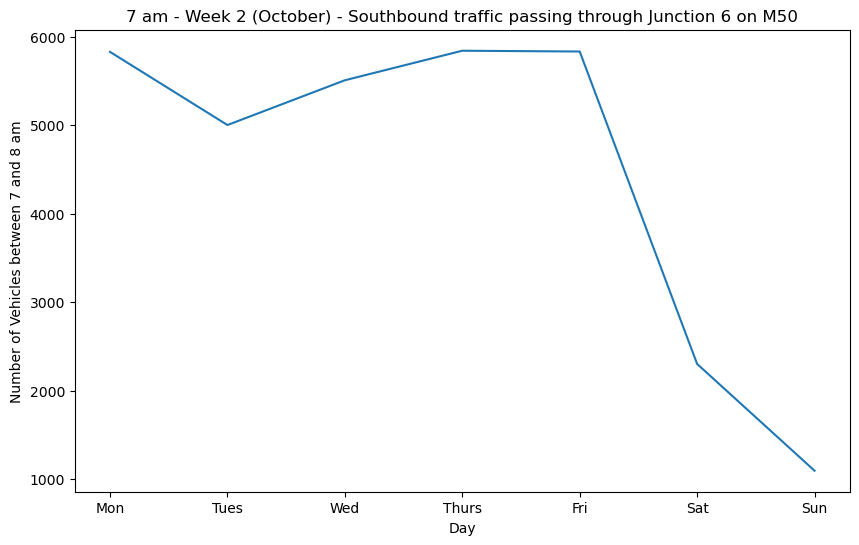

In [126]:
week2_7am = df.loc[(df['week'] == 2) & (df['hour'] == 7)]

plt.figure(figsize=(10,6))
plt.plot(week2_7am['day'], week2_7am['southbound'])
plt.xlabel('Day')
plt.ylabel('Number of Vehicles between 7 and 8 am')
plt.title('7 am - Week 2 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()